In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

seoul_202112 = pd.read_csv('seoul_202112.csv')
seoul_busan_201903 = pd.read_csv('seoul, busan_201903.csv')

In [95]:
# seoul_busan_201903 전처리
select_col = ['상호명', '상권업종대분류코드', '상권업종중분류명', '시군구명', '상가업소번호']
seoul_busan_201903 = seoul_busan_201903[select_col]
seoul_busan_201903['년도'] = 2019
seoul_busan_201903 = seoul_busan_201903[seoul_busan_201903['상권업종대분류코드'] == 'Q']
seoul_busan_201903_subset = seoul_busan_201903[['상권업종중분류명', '년도']]

In [96]:
seoul_busan_201903_subset

,상권업종중분류명,년도
0,커피점/카페,2019
1,유흥주점,2019
2,패스트푸드,2019
3,유흥주점,2019
5,패스트푸드,2019
...,...,...
539750,닭/오리요리,2019
539751,닭/오리요리,2019
539755,중식,2019
539756,중식,2019


In [97]:
# seoul_202112 전처리
select_col = ['상호명', '상권업종대분류코드', '상권업종중분류명', '시군구명', '상가업소번호']
seoul_202112 = seoul_202112[select_col]
seoul_202112['년도'] = 2021
seoul_202112 = seoul_202112[seoul_202112['상권업종대분류코드'] == 'Q']
seoul_202112_subset = seoul_202112[['상권업종중분류명', '년도']]

In [98]:
seoul_202112_subset

,상권업종중분류명,년도
4,한식,2021
5,한식,2021
6,한식,2021
7,한식,2021
8,유흥주점,2021
...,...,...
315261,분식,2021
315277,커피점/카페,2021
315278,한식,2021
315281,한식,2021


In [99]:
# 코로나 전후(2019, 2021)를 비교했을 때 상권업종중분류명별로 상권이 얼마나 줄었고 늘었는지 확인하기 위해 두 가지의 plot으로 비교
# lineplot과 barplot으로 각각 그리고 비교가 편리한 plot 선택

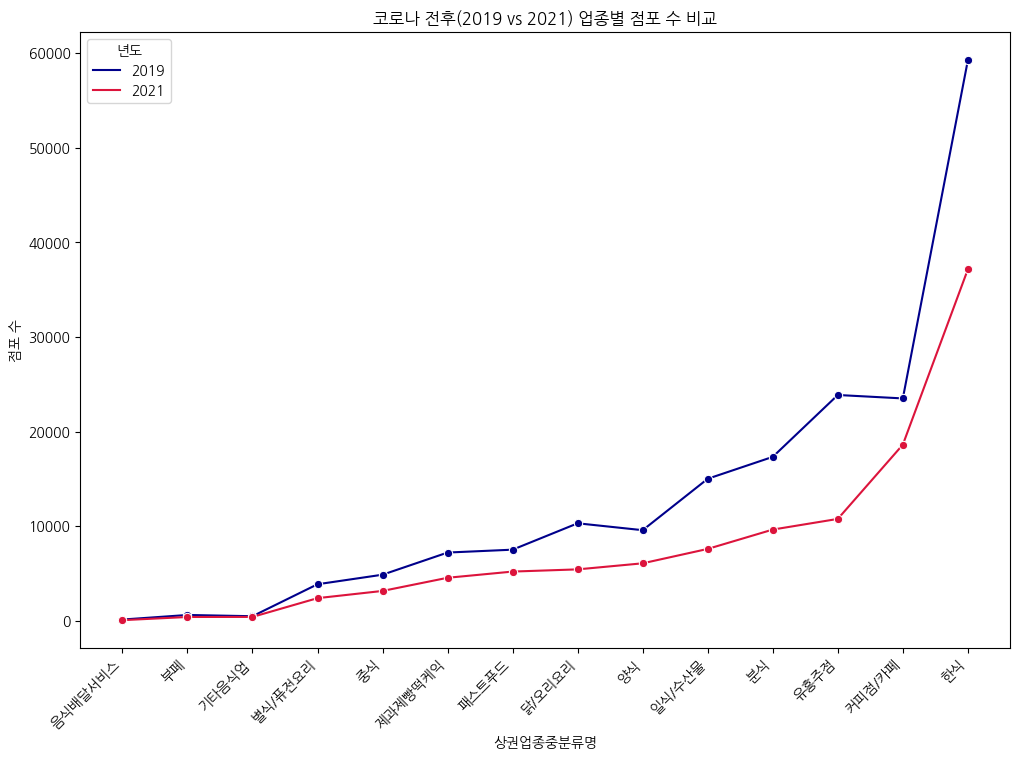

In [100]:
# lineplot ver.

import seaborn as sns
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumGothic'

df_combined = pd.concat([seoul_busan_201903_subset, seoul_202112_subset])

grouped_data = df_combined.groupby(['년도', '상권업종중분류명']).size().reset_index(name='점포 수')

# 오름차순 sort(점포 수 기준)
grouped_data = grouped_data.sort_values(by='점포 수', ascending=True)

plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='상권업종중분류명', y='점포 수', hue='년도', marker='o', palette=['darkblue', 'crimson'])
plt.xticks(rotation=45, ha='right')
plt.title('코로나 전후(2019 vs 2021) 업종별 점포 수 비교')
plt.show()

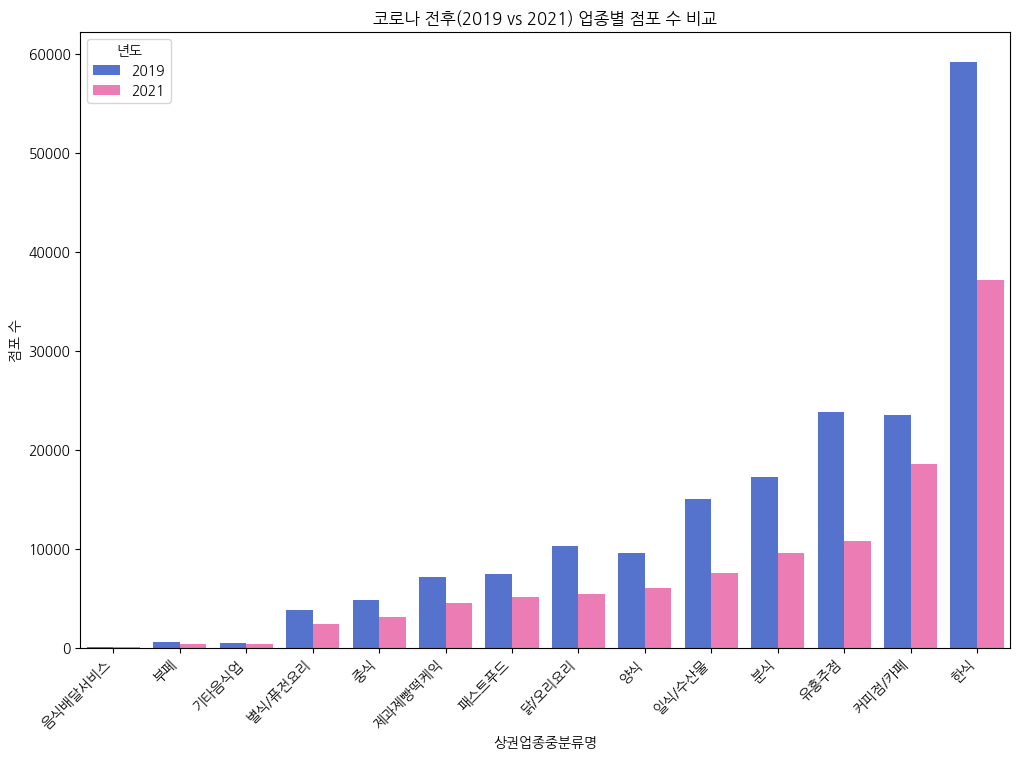

In [101]:
# barplot ver.

import seaborn as sns
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumGothic'

df_combined = pd.concat([seoul_busan_201903_subset, seoul_202112_subset])

grouped_data = df_combined.groupby(['년도', '상권업종중분류명']).size().reset_index(name='점포 수')

# 오름차순 sort(점포 수 기준)
grouped_data = grouped_data.sort_values(by='점포 수', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='상권업종중분류명', y='점포 수', hue='년도', palette=['royalblue', 'hotpink'])
plt.xticks(rotation=45, ha='right')
plt.title('코로나 전후(2019 vs 2021) 업종별 점포 수 비교')
plt.show()

In [102]:
# 코로나 전후로 업종별 점포 수 변화의 폭을 알아보기 위해 plot을 그린 것인데
# lineplot은 '한식'에 포커스가 쏠리므로
# barplot 선택!!